In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import cv2
import os

In [10]:
img = cv2.imread('a.png')

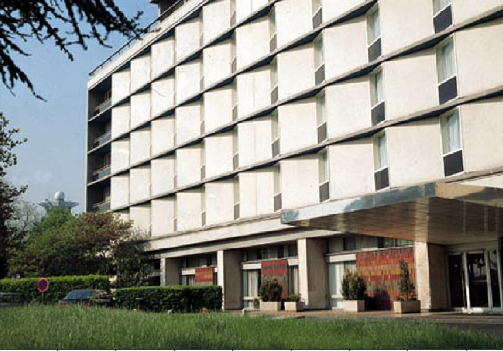

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [19]:
ret,thresh1 = cv2.threshold(img, 90, 200, cv2.THRESH_BINARY)

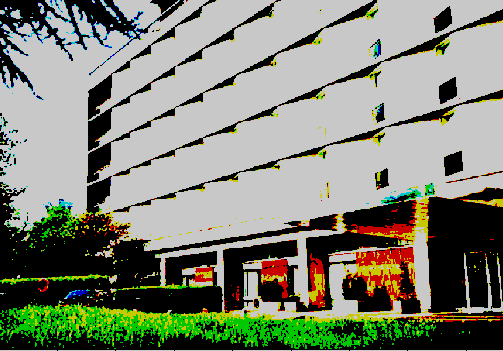

In [20]:
cv2_imshow(thresh1)

In [29]:
image1 = cv2.GaussianBlur(img, (3 ,3), 0)

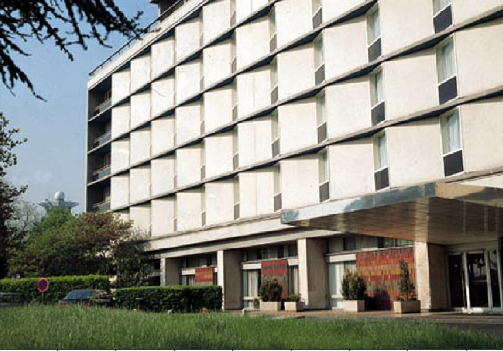

In [28]:
cv2_imshow(image1)

In [31]:
image2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

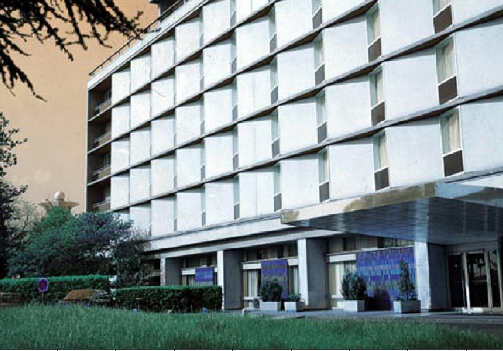

In [32]:
cv2_imshow(image2)

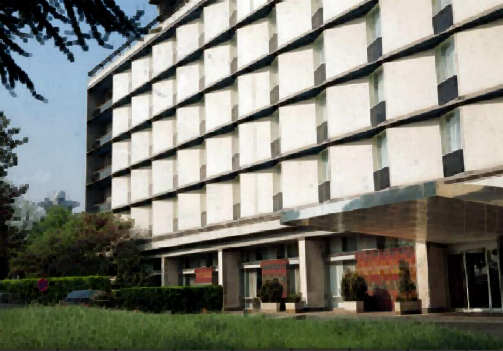

In [35]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
cv2_imshow(erosion)

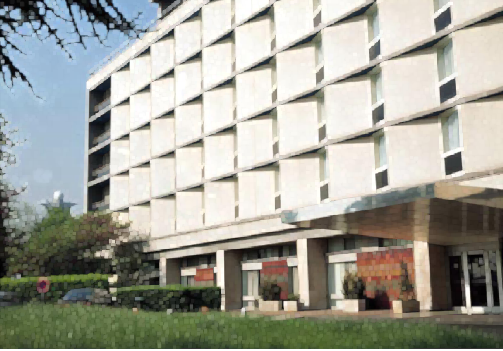

In [37]:
dilation = cv2.dilate(img, kernel, iterations = 1)
cv2_imshow(dilation)

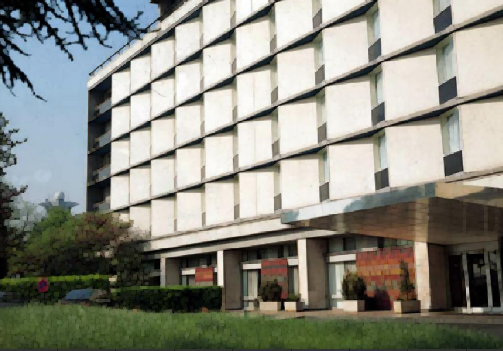

In [38]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

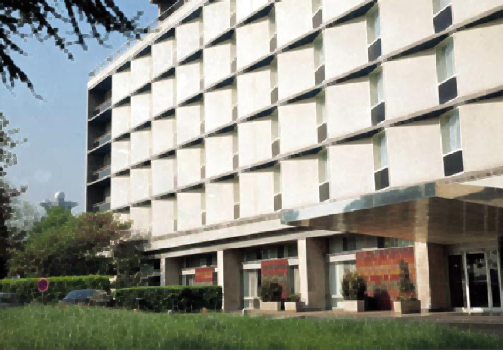

In [39]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

In [40]:
image = cv2.imread('img4.jpg')

In [41]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

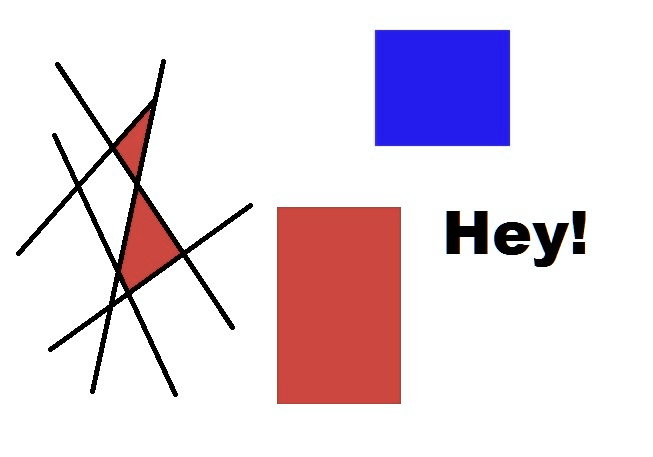

In [46]:
cv2_imshow(image)

In [42]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

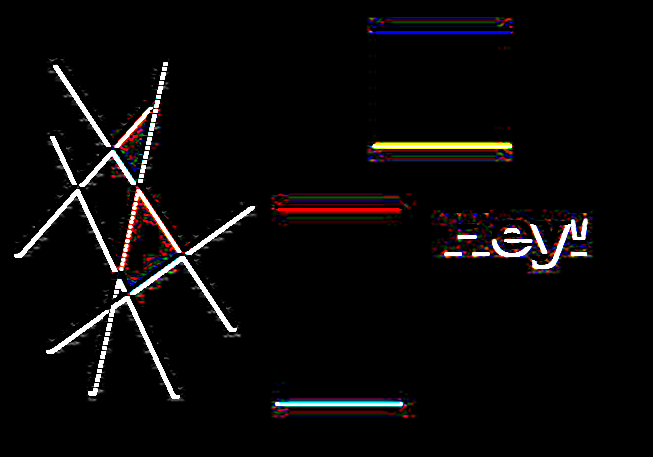

In [43]:
cv2_imshow(sobel_x)

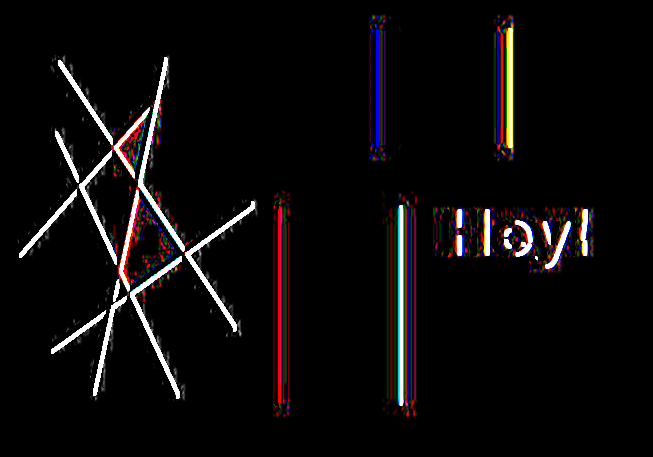

In [45]:
cv2_imshow(sobel_y)

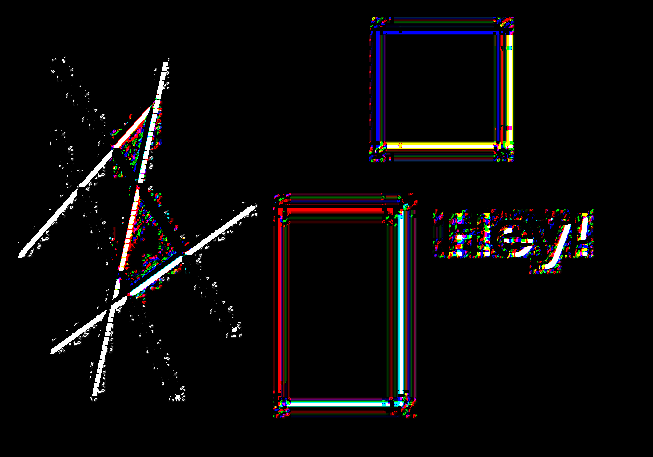

In [47]:
sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2_imshow(sobel_OR)

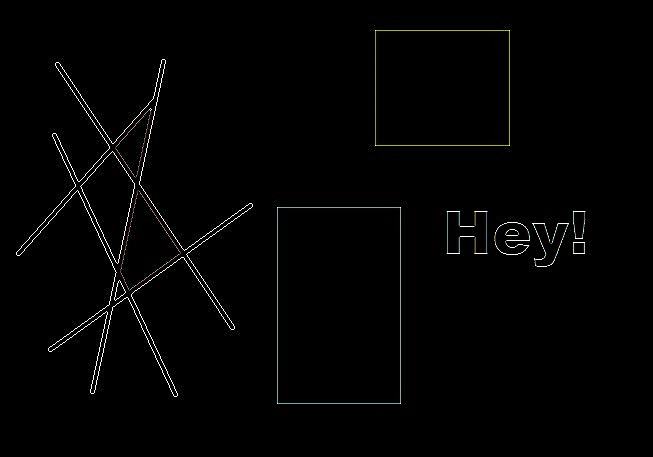

In [48]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2_imshow(laplacian)

In [49]:
#laplacian est le meilleur de détecter les contours

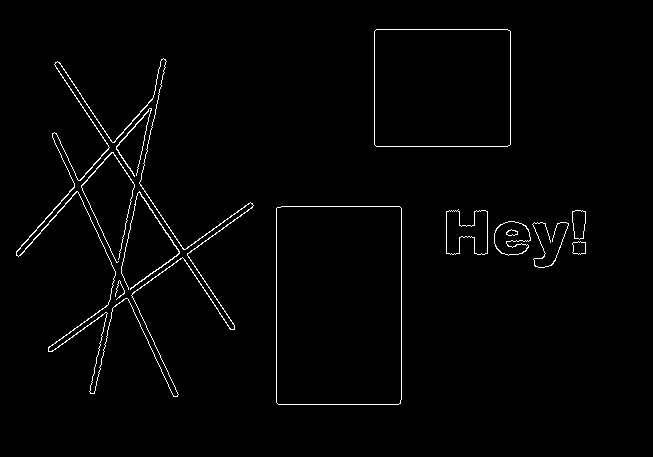

In [50]:
canny = cv2.Canny(image, 50, 120)
cv2_imshow(canny)

In [51]:
image1 = cv2.imread('b.png')

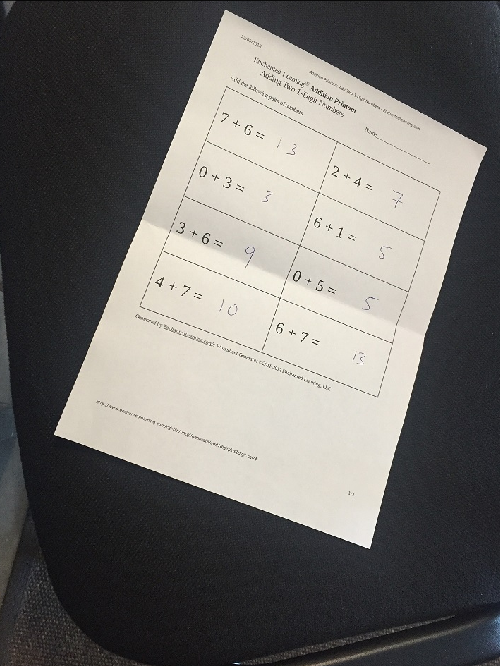

In [53]:
cv2_imshow(image1)

In [54]:
#Perpsective Transform

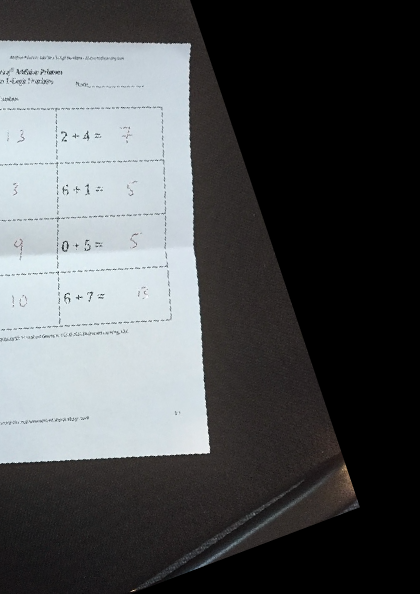

In [55]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image1, M, (420,594))

cv2_imshow(warped)


In [56]:
# on doit plotter image avec plt pour bien choisir les points

In [57]:
#Scaling, re-sizing and interpolations

In [58]:
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)


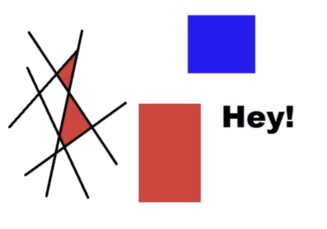

In [59]:
cv2_imshow(smaller)

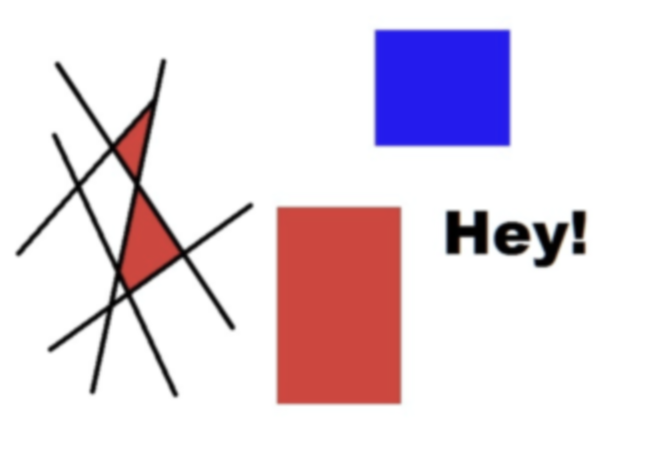

In [60]:
cv2_imshow(larger)

In [61]:
#Cropping

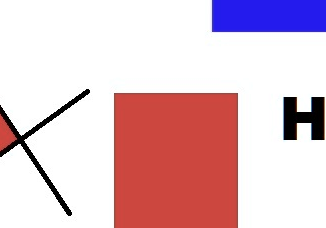

In [62]:
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]
cv2_imshow(cropped)

In [63]:
#Blurring

In [64]:
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred = cv2.filter2D(image, -1, kernel_7x7)

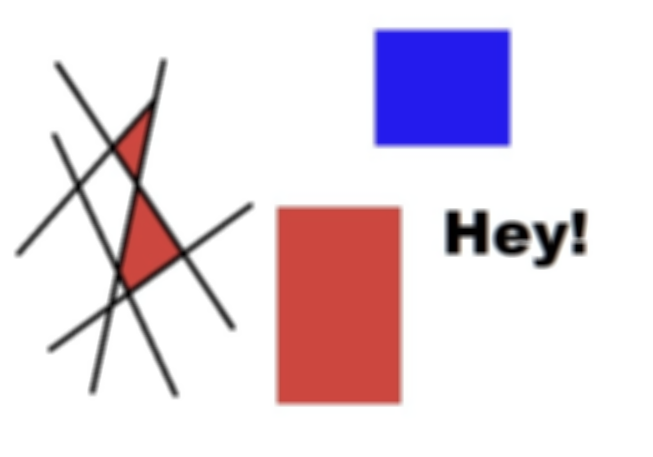

In [65]:
cv2_imshow(blurred)

In [66]:
#Contours

In [70]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
re = cv2.drawContours(image, contours, -1, (0,0,255), 3)

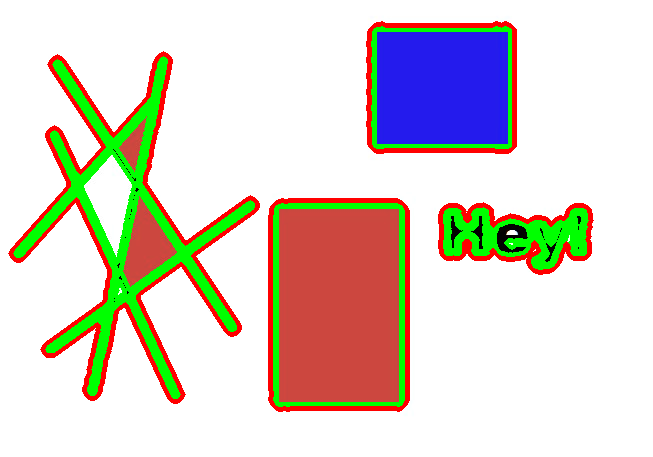

In [71]:
cv2_imshow(re)

In [72]:
#Finding Corners

In [74]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 10)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]


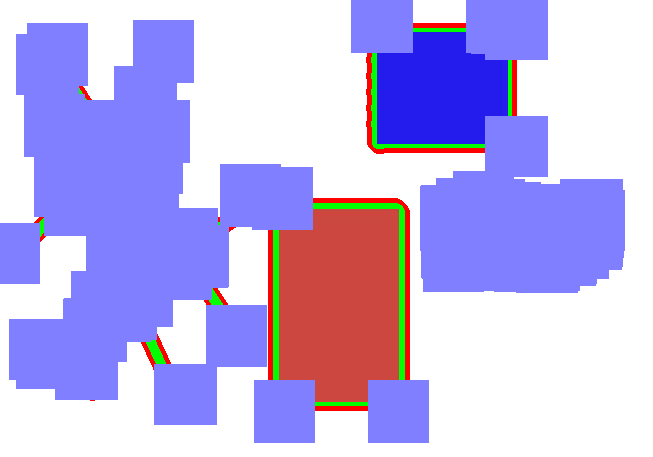

In [75]:
cv2_imshow(image)